In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import matplotlib.cm as cm
from scipy.io import loadmat
import random
from collections import defaultdict

In [2]:
from collections import namedtuple
with open("data/Lab2/ex2data1.txt") as ex1_file:
    ex1_data=ex1_file.readlines()
StudentResult=namedtuple("StudentResult", "first_exam, second_exam, entered")
student_data=[StudentResult(*list(map(float, line.strip().split(",")))) for line in ex1_data]
entered_students=[(result.first_exam, result.second_exam) for result in filter(lambda result: result.entered==1, student_data)]
not_entered_students=[(result.first_exam, result.second_exam) for result in filter(lambda result: result.entered==0, student_data)]
first_exam_data=np.array([result.first_exam for result in student_data])
second_exam_data=np.array([result.second_exam for result in student_data])
first_exam_mean=np.mean(first_exam_data)
first_exam_std=np.std(first_exam_data)
second_exam_mean=np.mean(second_exam_data)
second_exam_std=np.std(second_exam_data)
x_training=np.array([[(first_exam-first_exam_mean)/first_exam_std, (second_exam-second_exam_mean)/second_exam_std] for (first_exam, second_exam) in zip(first_exam_data, second_exam_data)])
y_training=np.array([student.entered for student in student_data], dtype=np.integer)

<IPython.core.display.Javascript object>


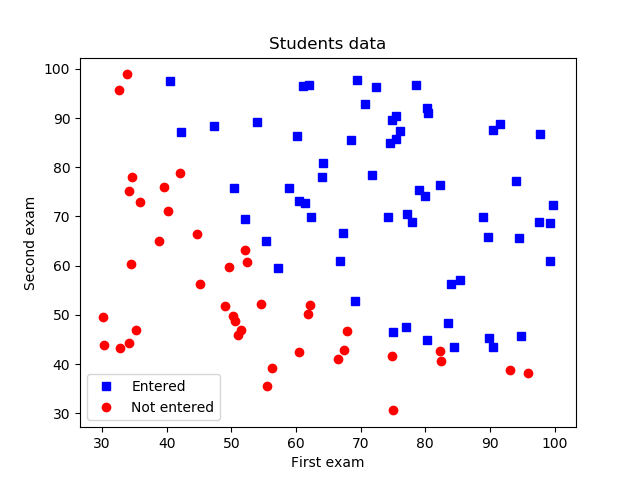

In [3]:
plt.figure()
plt.plot(*list(zip(*entered_students)), "bs", label="Entered")
plt.plot(*list(zip(*not_entered_students)), "ro", label="Not entered")
plt.legend()
plt.title("Students data")
plt.xlabel("First exam")
plt.ylabel("Second exam")
plt.show()

In [4]:
def get_hypothesis_lin(theta_arr):
    def hypothesis(x_arr):
        return 1/(1+np.exp(-np.dot(theta_arr.T, x_arr)))
    return hypothesis

In [5]:
def get_calculate_cost(get_hypothesis_value):
    def calculate_cost(x_training, y_training):
        cost=0
        for (x,y) in zip(x_training, y_training):
            if y!=0:
                cost+=np.log(get_hypothesis_value(x))
            else:
                cost+=np.log(1-get_hypothesis_value(x))
        return -cost/(x_training.shape[0])
    return calculate_cost

def get_calculate_cost_derivative(get_hypothesis_value):
    def calculate_cost_derivative(x_training, y_training):
        hypothesis_values=np.array([get_hypothesis_value(x) for x in x_training])
        return np.dot(x_training.T, np.subtract(hypothesis_values, y_training))/x_training.shape[0]
    return calculate_cost_derivative

In [4]:
def gradient_descent(theta_arr, x_training, y_training, eps=0.0001, alpha=0.5):
    hypothesis=get_hypothesis_lin(theta_arr)
    current_cost=get_calculate_cost(hypothesis)(x_training, y_training)
    previous_cost=current_cost-2*eps
    current_theta=theta_arr
    while np.fabs(previous_cost-current_cost)>eps:
        calculate_cost_derivative=get_calculate_cost_derivative(hypothesis)
        current_theta=current_theta-alpha*calculate_cost_derivative(x_training, y_training)
        previous_cost=current_cost
        hypothesis=get_hypothesis_lin(current_theta)
        current_cost=get_calculate_cost(hypothesis)(x_training, y_training)
    return current_theta

In [7]:
theta_arr=np.array([1, 1, 1])
x_training_copy=np.column_stack((np.ones(x_training.shape[0]), x_training))
theta_opt=gradient_descent(theta_arr, x_training_copy, y_training)
print(theta_opt)
print(get_calculate_cost(get_hypothesis_lin(theta_opt))(x_training_copy, y_training))

[1.20281725 2.90536681 2.6749618 ]
0.21318955296583528


In [8]:
def calculate_cost_wrapper(x, *args):
    return get_calculate_cost(get_hypothesis_lin(x))(x_training_copy, y_training)

In [9]:
nelder_mead_opt_theta=minimize(calculate_cost_wrapper, theta_arr, method="Nelder-Mead")
print(f"Nelder-Mead theta {nelder_mead_opt_theta.x}")
print(f"Nelder-Mead func {nelder_mead_opt_theta.fun}")
BFGS_opt_theta=minimize(calculate_cost_wrapper,  theta_arr, method="BFGS")
print(f"BFGS theta {BFGS_opt_theta.x}")
print(f"BFGS func {BFGS_opt_theta.fun}")
CG_opt_theta=minimize(calculate_cost_wrapper,  theta_arr, method="CG")
print(f"CG theta {CG_opt_theta.x}")
print(f"CG func {CG_opt_theta.fun}")

Nelder-Mead theta [1.71842232 3.99279191 3.72512169]
Nelder-Mead func 0.20349770161549494
BFGS theta [1.71839826 3.99276269 3.72519143]
BFGS func 0.20349770187091146
CG theta [1.71876415 3.99344173 3.72570187]
CG func 0.20349770417052035


In [10]:
def predict_proba(exam1_result, exam2_result):
    return theta_opt[0]+theta_opt[1]*(exam1_result-first_exam_mean)/first_exam_std+theta_opt[2]*(exam2_result-second_exam_mean)/second_exam_std

<IPython.core.display.Javascript object>


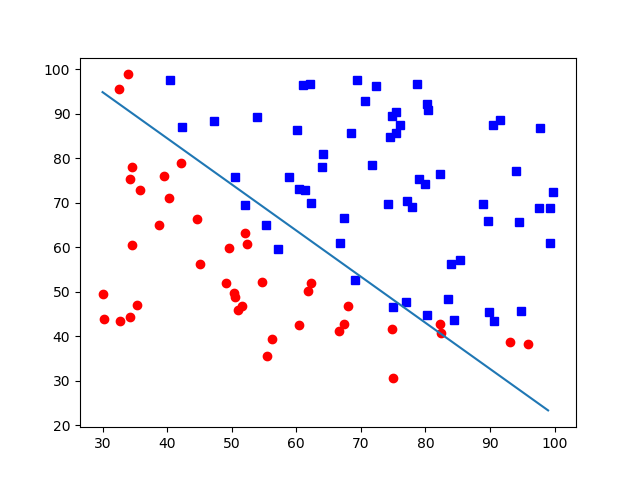

In [11]:
exam1_results=np.arange(30, 100, 1)
y=list(map(lambda x: -second_exam_std*(theta_opt[0]+theta_opt[1]*(x-first_exam_mean)/first_exam_std)/theta_opt[2]+second_exam_mean, exam1_results))
plt.figure()
plt.plot(*list(zip(*entered_students)), "bs")
plt.plot(*list(zip(*not_entered_students)), "ro")
plt.plot(exam1_results, y)
plt.show()

In [12]:
with open("data/Lab2/ex2data2.txt") as ex2_file:
    ex2_data=ex2_file.readlines()
TestResult=namedtuple("TestResult", "first_test, second_test, passed")
product_data=[TestResult(*list(map(float, line.strip().split(",")))) for line in ex2_data]
passed_products=[(result.first_test, result.second_test) for result in filter(lambda result: result.passed==1, product_data)]
not_passed_products=[(result.first_test, result.second_test) for result in filter(lambda result: result.passed==0, product_data)]
x_training2=np.array([[p.first_test, p.second_test] for p in product_data])
y_training2=np.array([product.passed for product in product_data], dtype=np.integer)

<IPython.core.display.Javascript object>


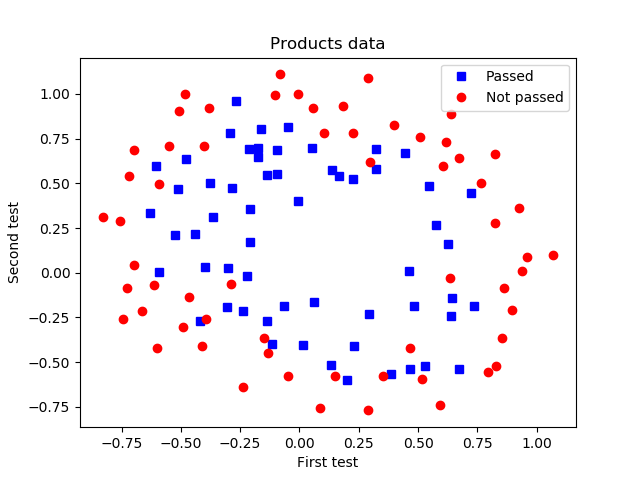

In [13]:
plt.figure()
plt.plot(*list(zip(*passed_products)), "bs", label="Passed")
plt.plot(*list(zip(*not_passed_products)), "ro", label="Not passed")
plt.legend()
plt.title("Products data")
plt.xlabel("First test")
plt.ylabel("Second test")
plt.show()

In [1]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def calculate_cost_with_reg(x_training, y_training, theta_arr, lambda_param):
    m = len(y_training)
    cost = (-1/m) * (y_training.T @ np.log(sigmoid(x_training @ theta_arr)) + (1 - y_training.T) @ np.log(1 - sigmoid(x_training @ theta_arr)))
    reg_value = (lambda_param/(2*m)) * (theta_arr[1:].T @ theta_arr[1:])
    cost = cost + reg_value
    return cost

In [2]:
def gradient_descent_with_reg(theta_arr, x_training, y_training, eps=0.00001, alpha=0.1, lambda_param=1):
    current_cost=calculate_cost_with_reg(x_training, y_training, theta_arr, lambda_param=lambda_param)
    previous_cost=current_cost-10*eps
    current_theta=theta_arr
    while np.fabs(previous_cost-current_cost)>eps:
        m = len(y_training)
        grad = np.zeros([m,1])
        grad = (1/m) * x_training.T @ (sigmoid(x_training @ theta_arr) - y_training)
        grad[1:] = grad[1:] + (lambda_param / m) * theta_arr[1:]
        current_theta-=grad
        previous_cost=current_cost
        current_cost=calculate_cost_with_reg(x_training, y_training, current_theta, lambda_param=lambda_param)
    return current_theta

In [67]:
from sklearn.preprocessing import PolynomialFeatures
theta_arr=np.array([0.01]*28)
poly = PolynomialFeatures(degree=6)
x_training2_pol=poly.fit_transform(x_training2)
theta_opt=gradient_descent_with_reg(theta_arr, x_training2_pol, y_training2)
print(theta_opt)
print(get_calculate_cost(get_hypothesis_lin(theta_opt))(x_training2_pol, y_training2))

[ 1.26315377  0.62008105  1.1757523  -2.00605701 -0.90417126 -1.40515271
  0.1227256  -0.36426384 -0.35881828 -0.17464588 -1.45462682 -0.05696387
 -0.61215053 -0.27063677 -1.18888779 -0.2410856  -0.2072686  -0.04966972
 -0.27485695 -0.29307849 -0.46531217 -1.04216803  0.02295124 -0.29176454
  0.01230065 -0.32535371 -0.14109602 -0.93370395]
0.4632409184349184


In [73]:
def calculate_cost_wrapper_task_2(x, *args):
    value=calculate_cost_with_reg(x_training2_pol, y_training2, x, 1)
    return value

In [74]:
nelder_mead_opt_theta=minimize(calculate_cost_wrapper_task_2, theta_arr, method="Nelder-Mead", options={
            'maxiter': 400,
            'disp': False,
        })
print(f"Nelder-Mead theta {nelder_mead_opt_theta.x}")
print(f"Nelder-Mead func {nelder_mead_opt_theta.fun}")
CG_opt_theta=minimize(calculate_cost_wrapper_task_2,  theta_arr, method="CG", options={
                'maxiter': 50,
                'disp': False,
            })
print(f"CG theta {CG_opt_theta.x}")
print(f"CG func {CG_opt_theta.fun}")

Nelder-Mead theta [ 1.07936187  0.822354    0.84414967  0.01661641 -0.48854598 -0.5309024
  0.16507918 -0.45374459 -0.45361191 -0.21213694 -0.96515445 -0.08425823
 -0.56463461 -0.31069808 -0.52940523 -0.31686897 -0.28356    -0.0458493
 -0.36995401 -0.38241755 -0.70073214 -0.89794264  0.01722292 -0.37030935
  0.01041839 -0.3784915  -0.14414656 -1.10926812]
Nelder-Mead func 0.031030502387443044
CG theta [ 1.26315377e+00  2.96639655e-04  5.62473051e-04 -9.59705989e-04
 -4.32563332e-04 -6.72232999e-04  5.87044879e-05 -1.74271320e-04
 -1.71666331e-04 -8.35580007e-05 -6.95901542e-04 -2.72588546e-05
 -2.92860499e-04 -1.29480222e-04 -5.68771891e-04 -1.15342897e-04
 -9.91648292e-05 -2.37694306e-05 -1.31499213e-04 -1.40216307e-04
 -2.22613050e-04 -4.98581079e-04  1.09724457e-05 -1.39587804e-04
  5.87716578e-06 -1.55656699e-04 -6.75078731e-05 -4.46691786e-04]
CG func 1.505293729381716e-08


<IPython.core.display.Javascript object>


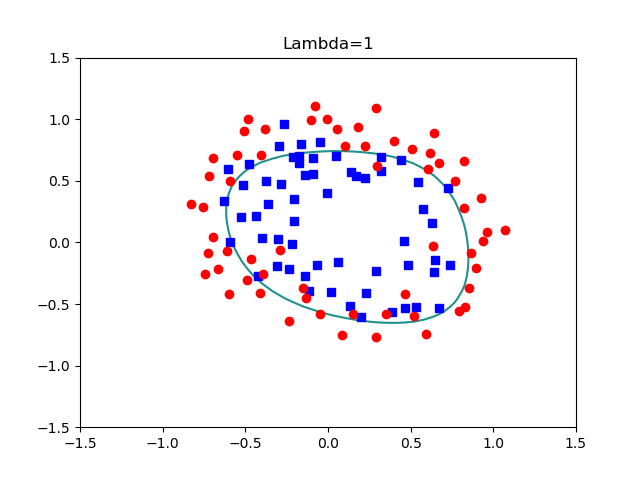

In [81]:
u = np.linspace(-1.5, 1.5, 50)
v = np.linspace(-1.5, 1.5, 50)
z = np.zeros((len(u), len(v)))
def map_feature(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(map_feature(u[i], v[j]), theta_opt)
plt.figure()
plt.plot(*list(zip(*passed_products)), "bs", label="Passed")
plt.plot(*list(zip(*not_passed_products)), "ro", label="Not passed")
plt.contour(u,v,z,0)
plt.title("Lambda=1")
plt.show()

<IPython.core.display.Javascript object>


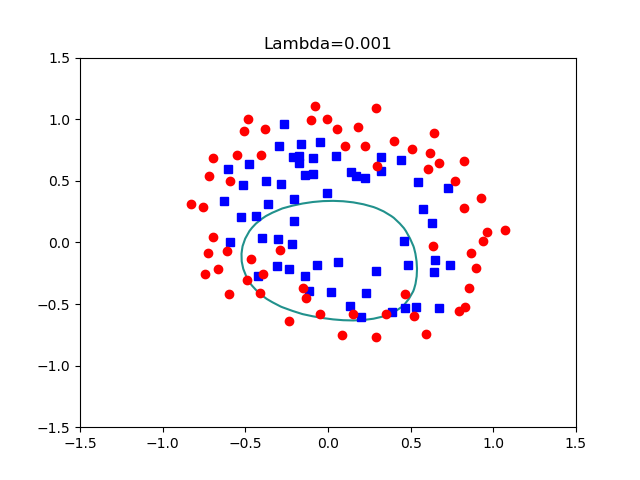

In [86]:
theta_opt_lambda_zero=gradient_descent_with_reg(theta_arr, x_training2_pol, y_training2, lambda_param=0.001)
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(map_feature(u[i], v[j]), theta_opt_lambda_zero)
plt.figure()
plt.plot(*list(zip(*passed_products)), "bs", label="Passed")
plt.plot(*list(zip(*not_passed_products)), "ro", label="Not passed")
plt.contour(u,v,z,0)
plt.title("Lambda=0.001")
plt.show()

<IPython.core.display.Javascript object>


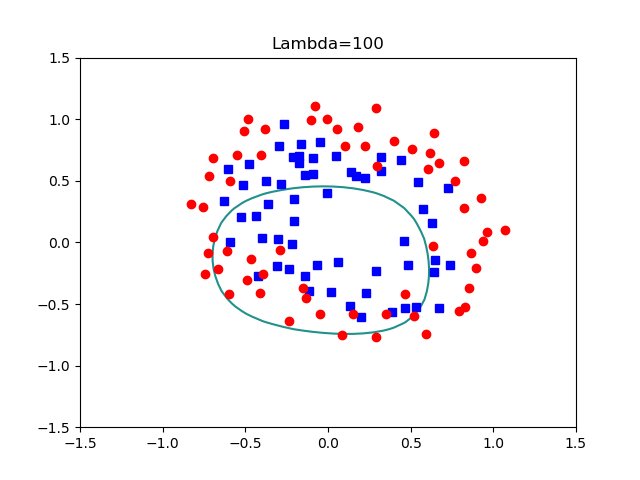

In [87]:
theta_opt_lambda_zero=gradient_descent_with_reg(theta_arr, x_training2_pol, y_training2, lambda_param=100)
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(map_feature(u[i], v[j]), theta_opt_lambda_zero)
plt.figure()
plt.plot(*list(zip(*passed_products)), "bs", label="Passed")
plt.plot(*list(zip(*not_passed_products)), "ro", label="Not passed")
plt.contour(u,v,z,0)
plt.title("Lambda=100")
plt.show()

<IPython.core.display.Javascript object>


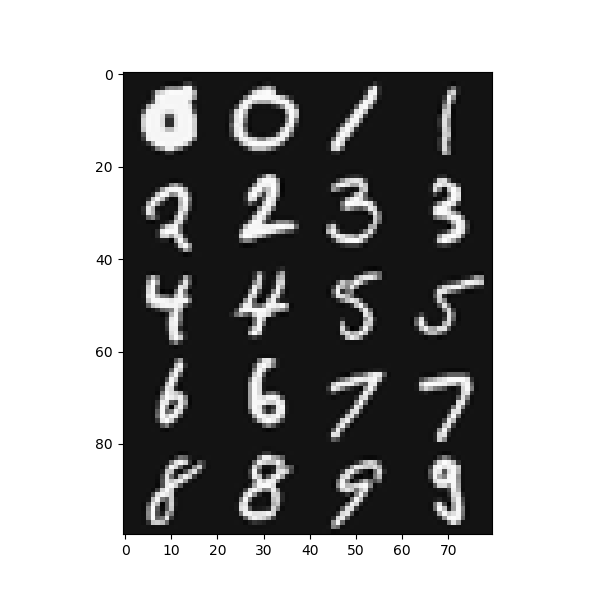

In [5]:
data = loadmat('data/Lab2/ex2data3.mat')
X_ex3=data["X"]
y_ex3=data["y"]
def display_images(X, y):
    def convert_image(image):
        cols, rows=20,20
        return image.reshape((cols, rows)).T
    nrows, ncols=5, 4
    indices_to_display=[]
    number_indixes=defaultdict(list)
    fig = plt.figure(figsize=(6,6))
    for (idx, value) in enumerate(y):
        number_indixes[value[0]].append(idx)
    for (value, idxes) in number_indixes.items():
        indices_to_display.extend(random.sample(idxes, 2))
    full_image=np.zeros((nrows*20, ncols*20))
    image_idx=0
    for i in range(1, nrows+1):
        for j in range(1, ncols+1):
            full_image[(i-1)*20:i*20, (j-1)*20:j*20]=convert_image(X[indices_to_display[image_idx], :])
            image_idx+=1
    plt.imshow(full_image,cmap = cm.Greys_r)
display_images(X_ex3, y_ex3)

In [6]:
X_ex3 = np.insert(X_ex3,0,1,axis=1)

In [10]:
def build_theta(X, y):
    theta_arr=np.zeros((10, 401))
    for i in range(1, 11):
        print(f"Processing class {i}")
        initial_theta=np.zeros(401)
        class_labels=np.array([1 if class_label==i else 0 for class_label in y])
        theta_opt=gradient_descent_with_reg(initial_theta, X, class_labels)
        theta_arr[i-1, :]=theta_opt
    return theta_arr

def classify_one_vs_all(X, y):
    classes=np.zeros(X.shape[0])
    theta_arr=build_theta(X, y)
    for (row_idx, row) in enumerate(X):
        hypothesis_values=np.zeros(10)
        for i in range(1, 11):
            hypothesis_values[i-1]=sigmoid(row @ theta_arr[i-1, :])
        classes[row_idx]=np.argmax(hypothesis_values)+1
    return classes
    
classes=classify_one_vs_all(X_ex3, y_ex3)
correct_answers=0
for (img_class, expected_img_class) in zip(classes, y_ex3):
    if img_class==expected_img_class:
        correct_answers+=1
print(correct_answers/y_ex3.shape[0])

Processing class 1
Processing class 2
Processing class 3
Processing class 4
Processing class 5
Processing class 6
Processing class 7
Processing class 8
Processing class 9
Processing class 10
0.9264
